# AI 사례실습과 함께하는 '드래곤볼'을 찾아서, 머신러닝!
* 드래곤볼 7개를 모으면 3가지 선물이 주어진다고 합니다.
* AI 모델링 A부터 Z까지의 각 과정에 드래곤볼이 숨겨져있다고 하는데요.
* 우리는 이제 네 번째 마을 '딥러닝' 마을에 도착했습니다.
* 그럼, 지금부터 네 번째 드래곤볼을 찾아볼까요?

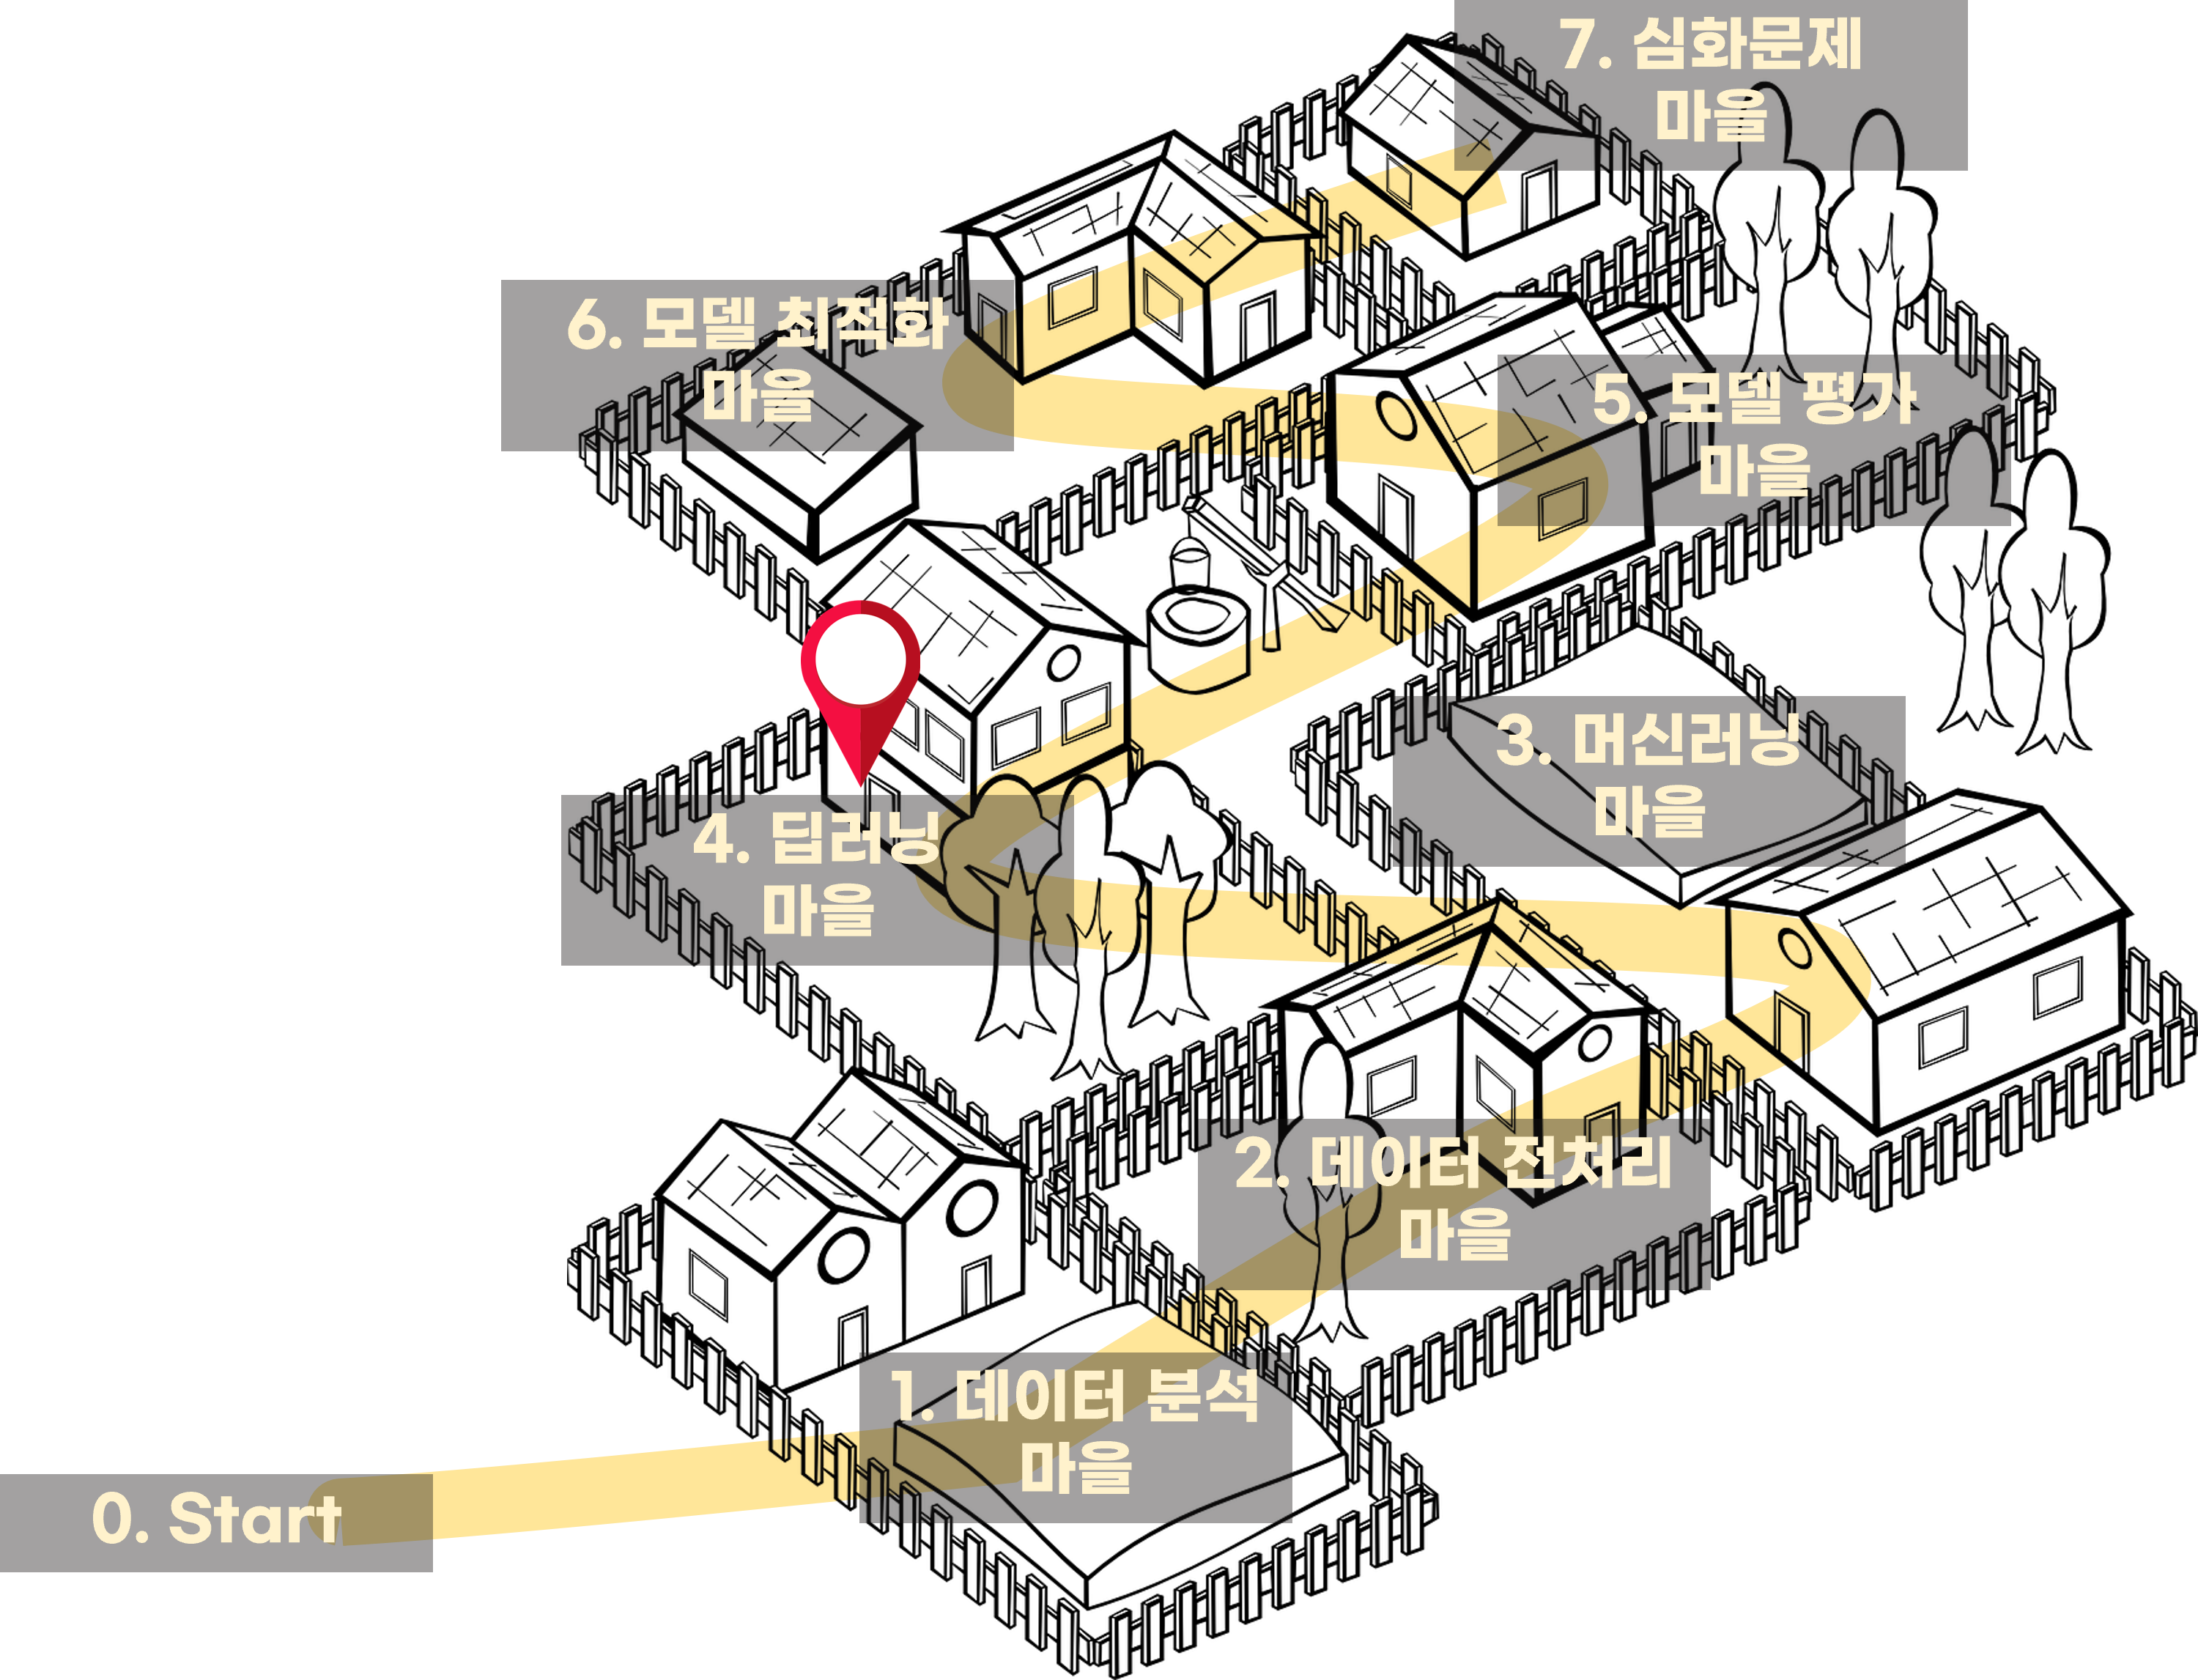

### [상황] 네 번째 드래곤볼을 찾아 보겠습니다. 
* 실습문제를 해결할 때마다 단서가 주어지는데요. 
* 이 단서를 기억해두었다가 마지막에 드래곤볼을 찾을 때 활용하시면 되요.

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas requests seaborn xgboost gspread oauth2client

In [ ]:
# ID를 입력해주세요.
ID = "finalTest"

---

# (실습준비) 데이터 불러오기부터

In [ ]:
import pandas as pd

# 학습/평가 데이터 로딩
df_feature = pd.read_csv("add_data/onenavi_train_feature.csv",sep="|")
df_target = pd.read_csv("add_data/onenavi_train_target.csv",sep="|")

In [ ]:
### Train/Test Data Split
from sklearn.model_selection import train_test_split

# train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_feature, df_target, test_size=0.20, random_state=42)

# 1. 회귀문제에 딥러닝 모델 적용하기
* 딥러닝은 머신 러닝의 특정한 한 분야로서 연속된 층(layer)에서 점진적으로 의미 있는 표현을 배우는 데 강점이 있으며, 데이터로부터 표현을 학습하는 새로운 방식입니다.
* 즉 계층적 표현 학습이라고도 할 수 있습니다.

[공식 Document 및 참고자료]
* 텐서 플로우 '자동차 연비 예측하기: 회귀'(https://www.tensorflow.org/tutorials/keras/regression?hl=ko)
* 텐서 플로우 블로그(https://tensorflow.blog/)

[모델링에서 눈여겨 볼 것들!]
* activation : output이 다음 레이어로 전해지는 과정 중 역할을 수행하는 수학적인 게이트(gate)
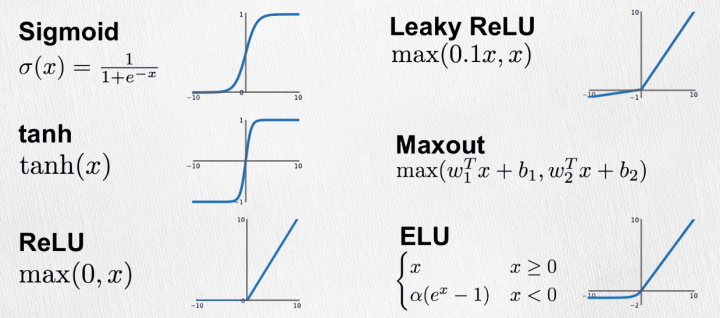
* optimizer : 손실함수를 최소화하도록 도와주는 알고리즘
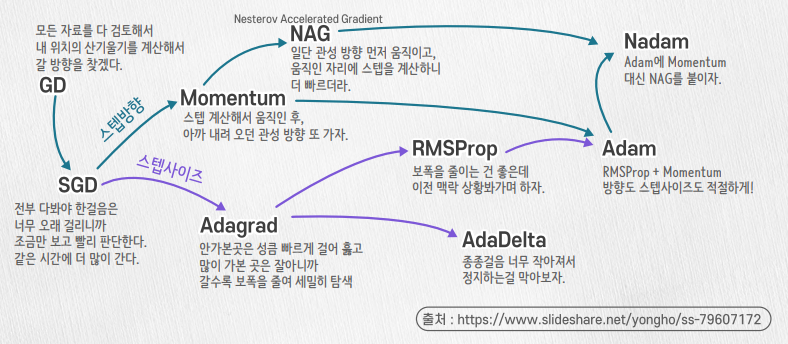

#### [실습문제1] 딥러닝_1
* 아래 그림을 기준으로 tensorflow 라이브러리를 활용한 모델을 만들어보세요.
* dense와 dense_1의 activation은 'relu'으로 지정해주세요.
* 모델 compile 시 loss는 'mse', optimizer는 'adam', metrics는 'mae'와 'mse'로 지정해주세요.
* 모델 학습 시에는 콜백 함수 두 가지를 적용해주세요.(EarlyStopping : val_loss기준 patience 10, ModelCheckpoint : val_loss기준 save_weights_only, save_best_only)
* 단서 : 여기서 만든 모델의 Total params는? Hint : model.summary()

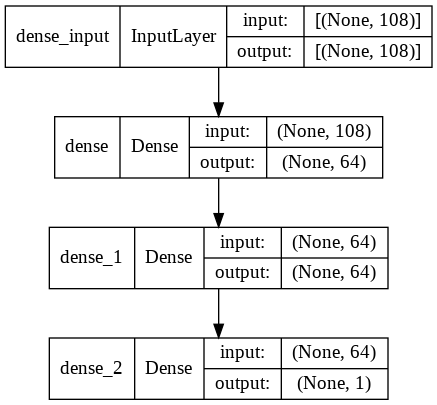

In [ ]:
# 아래에 실습코드를 작성하세요.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

# 모델 만들기 : 아주 간단한 모델

def build_model():
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_x.keys())]),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1)
            ])

    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae', 'mse'])
    return model

model = build_model()

In [ ]:
# 모델 학습
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # 조기종료 콜백함수 정의

checkpoint_path = 'model/tmp_checkpoint.ckpt'
cb_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, monitor='val_loss',
                               verbose=1, save_best_only=True) # 체크포인트 저장

history = model.fit(train_x, train_y, epochs=30,  
                   validation_data = (test_x,test_y),
                    callbacks=[cb_checkpoint, early_stopping]
                    )

In [ ]:
model.summary()

In [ ]:
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(history.history["loss"])), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(history.history["loss"])), history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(history.history["loss"])), history.history["mae"], label="train_mae")
plt.plot(np.arange(0, len(history.history["loss"])), history.history["val_mae"], label="val_mae")
plt.title("Training mae")
plt.xlabel("Epoch #")
plt.ylabel("mae")
plt.legend()
plt.show()

In [ ]:
# 아래에 단서를 적어주세요.
단서1 = "11201"# 단서1을 적어주세요.(문자형으로 적어주세요.)11,201

### 만약에 분류문제를 해결해야 한다면!(아래 내용은 일반적으로 선호되는 내용이지 절대적이라고 하지는 않습니다.)
1. `activation`설정
  * 마지막 출력층에 Label의 열이 하나고 두 개의 값으로 이루어진 이진분류라면 `sigmoid`
  * Label의 열이 두개 이상이라면 `softmax`
2. `loss`설정
  * 출력층 activation이 `sigmoid` 인 경우: `binary_crossentropy`
  * 출력층 activation이 `softmax` 인 경우: 
    * 원핫인코딩(O): `categorical_crossentropy`
    * 원핫인코딩(X): `sparse_categorical_crossentropy`
3. `metrics`를 'acc' 혹은 'accuracy'로 지정하면, 학습시 정확도를 모니터링 할 수 있습니다.

**원핫인코딩 여부 체크방법**

In [ ]:
# Case1 : 원핫인코딩이 안된 데이터
temp_y=[9,5,6,7,1,2,5,4,6,0]
temp_y[0]

In [ ]:
# Case2 : 원핫인코딩 적용
print(tf.one_hot(temp_y[0], 10))
print(tf.one_hot(temp_y, 10))

### 실습2. <u>만들어진 모델를 기반으로 모델파일로 저장해주세요.</u>
#### [실습문제2] 딥러닝_2
* 만들어진 모델를 기반으로 모델파일로 저장해주세요.
* 파일 저장 전에 ModelCheckpoint의 가중치(weights)를 로딩해주세요.
* 저장위치는 model 폴더입니다.
* 파일명은 DeeplearningModel.h5
* 단서 : ModelCheckpoint의 가중치(weights)를 로딩하는 함수는? Hint : load_ooooooo

In [ ]:
# 아래에 실습코드를 작성하세요.
model.load_weights(checkpoint_path)
model.save("model/DeeplearningModel.h5")




In [ ]:
# 아래에 단서를 적어주세요.
단서2 = "load_weights"# 단서2를 적어주세요.(문자형으로 적어주세요.)load_weights

### 모델을 이해해봅시다(모델을 설명해보려는 시도
#### weights를 확인해서 가중치와 편향을 알 수 있습니다.

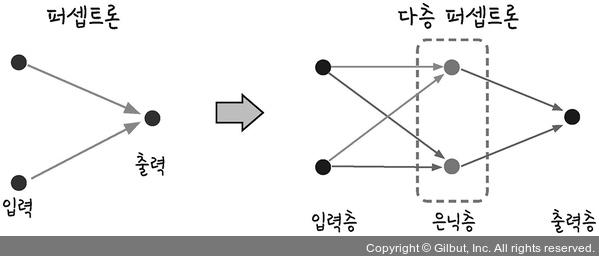
[참고] 모두의 딥러닝

In [ ]:
# Input_layer 가중치
model.layers[0].get_weights()[0]

In [ ]:
# Input_layer 편향
model.layers[0].get_weights()[1]

In [ ]:
# Dense 가중치
model.layers[1].get_weights()[0]

In [ ]:
# Dense 편향
model.layers[1].get_weights()[1]

In [ ]:
# output 가중치
model.layers[2].get_weights()[0]

In [ ]:
# output 편향
model.layers[2].get_weights()[1]

---

### [드래곤볼을 찾아라] 주어진 단서를 모아서 드래곤볼을 찾아보겠습니다.
* 소스코드 실행 후 드래곤볼 이미지 창이 열리고 "드래곤볼을 찾았습니다."라는 문구가 출력된다면 여러분은 드래곤볼을 찾은 거랍니다.

In [ ]:
# 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.
import module

module.fourthModule(ID, 단서1, 단서2)

In [ ]:
# 확인
from IPython.display import Image
Image("./dragonball/4성구.png", width=300, height=300)